In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
import math
import torch
import gpytorch
from sklearn.preprocessing import *

In [47]:
df=pd.read_excel("UGP_Data.xlsx",sheet_name="Data_Model")

In [48]:
df.head()

,wt%,salt [mM],tan delta,delta,Temp,n,noise_n,FD,noise_fd,tg,log_tg,noise_tg,time [h],G',"G""",avg_noise_tg,noise_log_tg,S,log_S,noise_S
0,4.0,3.0,0.247,0.242153,30,0.154159,NaN,2.364575,NaN,30.430000,1.483302,--,--,39.693475,10.931510,28.928000,1.461318,40.751042,1.610139,NaN
1,3.8,3.0,0.275,0.268366,30,0.170847,NaN,2.349030,NaN,34.931000,1.543211,--,--,28.629795,8.905488,28.928000,1.461318,29.501316,1.469841,NaN
2,4.0,0.0,0.287,0.279488,30,0.177928,0.000883,2.342379,0.000831,282.000000,2.450249,0,4.7,53.635362,16.428162,28.928000,1.461318,55.356978,1.743172,21.773822
3,3.8,0.0,0.310,0.300606,30,0.191372,0.00145,2.329658,0.00138,563.333333,2.750765,13.058333,9.388889,39.357156,13.865581,13.058333,1.115888,40.747212,1.610098,12.38365
4,3.6,0.0,0.336,0.324149,30,0.206359,0.000857,2.315331,0.000824,649.033333,2.812267,48.841667,10.817222,31.042231,10.967994,48.841667,1.688790,32.253468,1.508576,9.100433


In [49]:
dfx=df[["wt%","salt [mM]","Temp"]]
dfy=df[["n","log_tg","log_S"]]

In [50]:
idx=dfx["Temp"]!=30

In [51]:
tsne=manifold.TSNE(n_components=2,random_state=42)
dr=tsne.fit_transform(dfx)

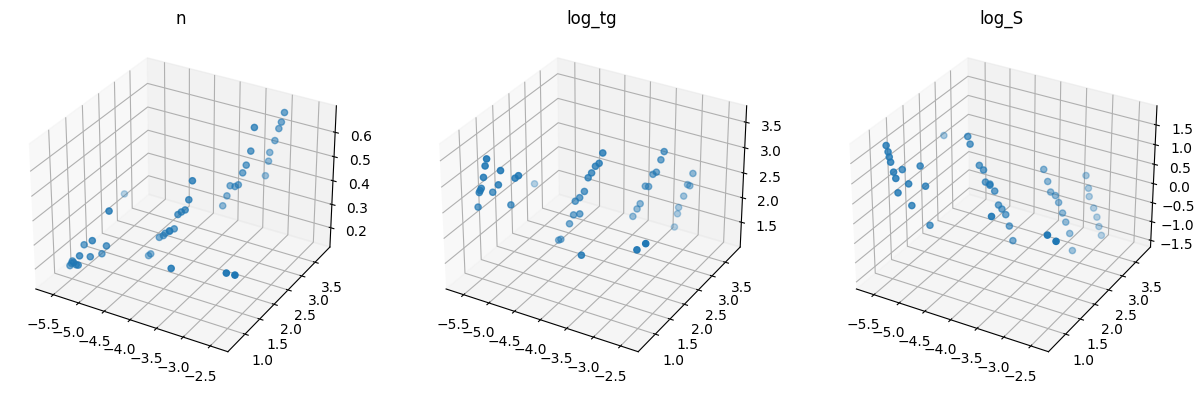

In [52]:
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["n"])
ax.set_title("n")
ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["log_tg"])
ax.set_title("log_tg")
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["log_S"])
ax.set_title("log_S")
plt.show()

In [53]:
X=np.array(dfx)
y=np.array(dfy)
outputs=["n","log_tg","log_S"]

In [54]:
salt_conc=np.array([0.4,1,3,5,7])
wt_var=np.arange(1,5,0.1)
X_test_opt=[]
temp=30*np.ones((6))
sz=len(wt_var)
wt_var=np.reshape(wt_var,(sz,1))
X_test_opt=wt_var
X_test_opt=np.hstack((X_test_opt,0*np.ones((sz,1)),30*np.ones((sz,1))))

In [55]:
for j in range (len(salt_conc)):
    X_test_opt=np.vstack((X_test_opt,np.hstack((wt_var,salt_conc[j]*np.ones((sz,1)),30*np.ones((sz,1))))))

In [56]:
X_test_opt

array([[ 1. ,  0. , 30. ],
       [ 1.1,  0. , 30. ],
       [ 1.2,  0. , 30. ],
       [ 1.3,  0. , 30. ],
       [ 1.4,  0. , 30. ],
       [ 1.5,  0. , 30. ],
       [ 1.6,  0. , 30. ],
       [ 1.7,  0. , 30. ],
       [ 1.8,  0. , 30. ],
       [ 1.9,  0. , 30. ],
       [ 2. ,  0. , 30. ],
       [ 2.1,  0. , 30. ],
       [ 2.2,  0. , 30. ],
       [ 2.3,  0. , 30. ],
       [ 2.4,  0. , 30. ],
       [ 2.5,  0. , 30. ],
       [ 2.6,  0. , 30. ],
       [ 2.7,  0. , 30. ],
       [ 2.8,  0. , 30. ],
       [ 2.9,  0. , 30. ],
       [ 3. ,  0. , 30. ],
       [ 3.1,  0. , 30. ],
       [ 3.2,  0. , 30. ],
       [ 3.3,  0. , 30. ],
       [ 3.4,  0. , 30. ],
       [ 3.5,  0. , 30. ],
       [ 3.6,  0. , 30. ],
       [ 3.7,  0. , 30. ],
       [ 3.8,  0. , 30. ],
       [ 3.9,  0. , 30. ],
       [ 4. ,  0. , 30. ],
       [ 4.1,  0. , 30. ],
       [ 4.2,  0. , 30. ],
       [ 4.3,  0. , 30. ],
       [ 4.4,  0. , 30. ],
       [ 4.5,  0. , 30. ],
       [ 4.6,  0. , 30. ],
 

In [57]:
sc_X=StandardScaler()
X_sc=sc_X.fit_transform(X)
X_test_opt_sc=sc_X.transform(X_test_opt)

In [58]:
sc_y=StandardScaler()
y_sc=sc_y.fit_transform(y)

In [59]:
sc_y.mean_

array([0.36045261, 2.52201917, 0.32363501])

In [60]:
sc_y.var_

array([0.01803499, 0.37730585, 0.74858488])

Training Set X 


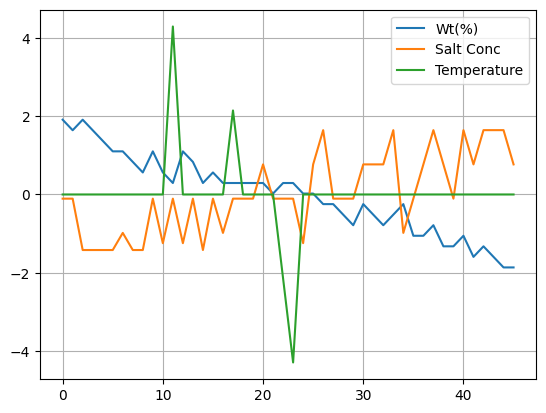

In [61]:
print("Training Set X ")
plt.plot(X_sc)
plt.legend(["Wt(%)","Salt Conc","Temperature"])
plt.grid()

Training Set y 


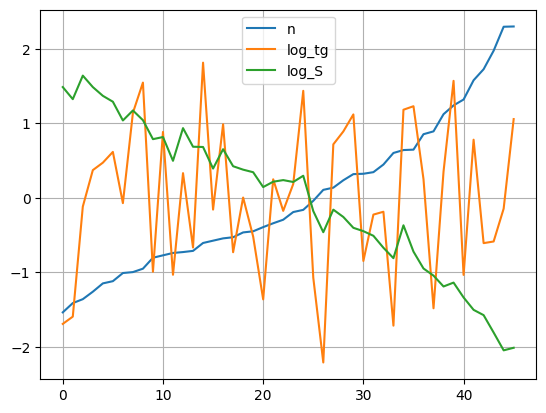

In [62]:
print("Training Set y ")
plt.plot(y_sc)
plt.legend(["n","log_tg","log_S"])
plt.grid()

In [63]:
X_sc=torch.tensor(X_sc)
y_sc=torch.tensor(y_sc)
X_test_opt_sc=torch.tensor(X_test_opt_sc)

In [64]:
X_test_opt_sc

tensor([[-2.1320, -1.4184,  0.0000],
        [-1.9973, -1.4184,  0.0000],
        [-1.8626, -1.4184,  0.0000],
        [-1.7279, -1.4184,  0.0000],
        [-1.5932, -1.4184,  0.0000],
        [-1.4585, -1.4184,  0.0000],
        [-1.3237, -1.4184,  0.0000],
        [-1.1890, -1.4184,  0.0000],
        [-1.0543, -1.4184,  0.0000],
        [-0.9196, -1.4184,  0.0000],
        [-0.7849, -1.4184,  0.0000],
        [-0.6502, -1.4184,  0.0000],
        [-0.5154, -1.4184,  0.0000],
        [-0.3807, -1.4184,  0.0000],
        [-0.2460, -1.4184,  0.0000],
        [-0.1113, -1.4184,  0.0000],
        [ 0.0234, -1.4184,  0.0000],
        [ 0.1581, -1.4184,  0.0000],
        [ 0.2929, -1.4184,  0.0000],
        [ 0.4276, -1.4184,  0.0000],
        [ 0.5623, -1.4184,  0.0000],
        [ 0.6970, -1.4184,  0.0000],
        [ 0.8317, -1.4184,  0.0000],
        [ 0.9665, -1.4184,  0.0000],
        [ 1.1012, -1.4184,  0.0000],
        [ 1.2359, -1.4184,  0.0000],
        [ 1.3706, -1.4184,  0.0000],
 

In [65]:
n=0.4
log_tg=3.2
log_s=-0.02
y_req=np.reshape(np.array([n,log_tg,log_s]),(1,-1))
y_req_sc=sc_y.transform(y_req)

In [66]:
def error_est(y_req,pred,lower,upper):
    error=((y_req[0]-pred[0])/(upper[0]-lower[0]))**2+((y_req[1]-pred[1])/(upper[1]-lower[1]))**2+((y_req[2]-pred[2])/(upper[2]-lower[2]))**2
    return error

## Independent Inference using RBF Kernel

In [67]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()

In [68]:
class GK_GP_Model(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GK_GP_Model, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [69]:
pred_gk_test_means=np.zeros((len(X_test_opt),3))
pred_gk_test_lower=np.zeros((len(X_test_opt),3))
pred_gk_test_upper=np.zeros((len(X_test_opt),3))

In [70]:
for j in range(3):
    print("Training for",outputs[j])
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model_gk = GK_GP_Model(X_sc,y_sc[:,j], likelihood)
    training_iter=50
    
    model_gk.train()
    likelihood.train()
    
    # Use the adam optimizer
    optimizer_gk = torch.optim.Adam(model_gk.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
    
    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_gk)
    
    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer_gk.zero_grad()
        # Output from model
        output_gk = model_gk(X_sc)
        # Calc loss and backprop gradients
        loss_gk = -mll(output_gk, y_sc[:,j])
        loss_gk.backward()
        # print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        #      i + 1, training_iter, loss_gk.item(),
        #      model_gk.covar_module.base_kernel.lengthscale.item(),
        #      model_gk.likelihood.noise.item()
        #  ))
        optimizer_gk.step()
    lengthscale=model_gk.covar_module.base_kernel.lengthscale.item()
    noise = model_gk.likelihood.noise.item()
    print("Length scale for the trained RBF Kernel for ",outputs[j]," : ",lengthscale)
    print("Noise Parameter of the Gaussian likelihood for",outputs[j]," : ",noise)
    model_gk.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Obtain the predictive mean and covariance matrix
        f_preds_gk = model_gk(X_test_opt_sc)
        f_mean_gk= f_preds_gk.mean
        f_cov_gk = f_preds_gk.covariance_matrix
    
        # Make predictions by feeding model through likelihood
        observed_pred_gk = likelihood(model_gk(X_test_opt_sc))
        lower_gk, upper_gk = observed_pred_gk.confidence_region()
        pred_gk_test_means[:,j]=observed_pred_gk.mean.numpy()
        pred_gk_test_lower[:,j]=lower_gk.numpy()
        pred_gk_test_upper[:,j]=upper_gk.numpy()

Training for n
Length scale for the trained RBF Kernel for  n  :  3.752373456954956
Noise Parameter of the Gaussian likelihood for n  :  0.031531888991594315
Training for log_tg
Length scale for the trained RBF Kernel for  log_tg  :  3.53654408454895
Noise Parameter of the Gaussian likelihood for log_tg  :  0.02366073802113533
Training for log_S
Length scale for the trained RBF Kernel for  log_S  :  4.159211158752441
Noise Parameter of the Gaussian likelihood for log_S  :  0.014183304272592068


In [71]:
pred_gk_test_means_org_dim=sc_y.inverse_transform(pred_gk_test_means)
pred_gk_test_lower_org_dim=sc_y.inverse_transform(pred_gk_test_lower)
pred_gk_test_upper_org_dim=sc_y.inverse_transform(pred_gk_test_upper)

In [72]:
min=10000
for j in range(len(pred_gk_test_means)):
    if(error_est(y_req_sc[0],pred_gk_test_means[j,:],pred_gk_test_lower[j,:],pred_gk_test_upper[j,:])<min):
        optim_cond=X_test_opt[j]
        optim_idx=j
        min=error_est(y_req_sc[0],pred_gk_test_means[j,:],pred_gk_test_lower[j,:],pred_gk_test_upper[j,:])  

In [73]:
y_req_sc

array([[ 0.29448277,  1.10374981, -0.3971704 ]])

In [74]:
pred_gk_test_means[j,:]

array([-1.51126996, -4.06667527,  1.34863844])

In [75]:
optim_cond

array([ 2.1,  3. , 30. ])

In [76]:
min

0.1377590013612069

In [77]:
pred_gk_test_means[optim_idx,:]

array([ 0.43666192,  0.91945206, -0.46575544])

In [78]:
print("Required Parameters:")
print(y_req)
print("Optimum Conditions for synthesis:")
print(optim_cond)
print("Parameters Obtained using the optmimum synthesis conditions:")
print(pred_gk_test_means_org_dim[optim_idx,:])

Required Parameters:
[[ 0.4   3.2  -0.02]]
Optimum Conditions for synthesis:
[ 2.1  3.  30. ]
Parameters Obtained using the optmimum synthesis conditions:
[ 0.41909387  3.08679469 -0.07934033]


## MOGP Joint Inference using RBF

In [79]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=3
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.RBFKernel(), num_tasks=3, rank=1
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

likelihood_mogp = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=3)

In [80]:
X_32_sc=X_sc.to(torch.float32)
y_32_sc=y_sc.to(torch.float32)
X_test32_opt_sc=X_test_opt_sc.to(torch.float32)

In [81]:
model_mogp = MultitaskGPModel(X_32_sc,y_32_sc,likelihood_mogp)

In [82]:
training_iterations =50


# Find optimal model hyperparameters
model_mogp.train()
likelihood_mogp.train()

# Use the adam optimizer
optimizer_mogp = torch.optim.Adam(model_mogp.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll_mogp = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_mogp, model_mogp)

for i in range(training_iterations):
    optimizer_mogp.zero_grad()
    output_mogp = model_mogp(X_32_sc)
    loss_mogp = -mll_mogp(output_mogp,y_32_sc)
    loss_mogp.backward()
    optimizer_mogp.step()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [83]:
mean_params = model_mogp.mean_module.state_dict()
covar_params = model_mogp.covar_module.task_covar_module.covar_matrix.numpy()

In [84]:
mean_params

OrderedDict([('base_means.0.raw_constant', tensor(0.4320)),
             ('base_means.1.raw_constant', tensor(-0.3564)),
             ('base_means.2.raw_constant', tensor(-0.3012))])

In [85]:
covar_params

array([[ 2.510312 ,  0.8171749, -2.2495995],
       [ 0.8171749,  3.5667195, -0.7362689],
       [-2.2495995, -0.7362689,  2.0744822]], dtype=float32)

In [86]:
# Set into eval mode
model_mogp.eval()
likelihood_mogp.eval()


# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_mogp = likelihood_mogp(model_mogp(X_test32_opt_sc))
    mean_mogp = predictions_mogp.mean
    lower_mogp, upper_mogp = predictions_mogp.confidence_region()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [87]:
mean_mogp_org_dim=sc_y.inverse_transform(mean_mogp)
lower_mogp_org_dim=sc_y.inverse_transform(lower_mogp)
upper_mogp_org_dim=sc_y.inverse_transform(upper_mogp)

In [88]:
min=10000
for j in range(len(pred_gk_test_means)):
    if(error_est(y_req_sc[0],mean_mogp[j,:],lower_mogp[j,:],upper_mogp[j,:])<min):
        optim_cond_mogp=X_test_opt[j]
        optim_idx_mogp=j
        min=error_est(y_req_sc[0],mean_mogp[j,:],lower_mogp[j,:],upper_mogp[j,:])  

In [89]:
print("Required Parameters:")
print(y_req)
print("Optimum Conditions for synthesis:")
print(optim_cond_mogp)
print("Parameters Required:")
print(mean_mogp_org_dim[optim_idx_mogp,:])

Required Parameters:
[[ 0.4   3.2  -0.02]]
Optimum Conditions for synthesis:
[ 2.1  3.  30. ]
Parameters Required:
[ 0.42071945  3.0832329  -0.05864859]


In [90]:
10**(-0.33)

0.4677351412871982